In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [197]:
df=pd.read_csv("train.csv")

In [198]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

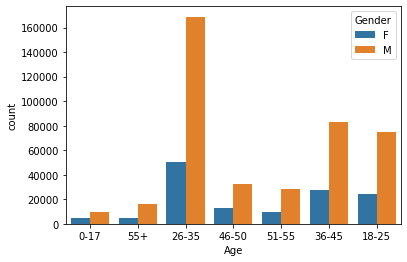

In [4]:
sns.countplot(df["Age"],hue=df["Gender"])

In [199]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [64]:
df.shape,df.dtypes

((550068, 12),
 User_ID                         int64
 Product_ID                     object
 Gender                         object
 Age                            object
 Occupation                      int64
 City_Category                  object
 Stay_In_Current_City_Years     object
 Marital_Status                  int64
 Product_Category_1              int64
 Product_Category_2            float64
 Product_Category_3            float64
 Purchase                        int64
 dtype: object)

In [65]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [66]:
for col in df.columns:
    print(col)
    print("Unique "+str(df[col].nunique()))
    print("Value_counts")
    print(df[col].value_counts())

User_ID
Unique 5891
Value_counts
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
Product_ID
Unique 3631
Value_counts
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00056542       1
P00357542       1
P00070142       1
P00149742       1
P00287042       1
Name: Product_ID, Length: 3631, dtype: int64
Gender
Unique 2
Value_counts
M    414259
F    135809
Name: Gender, dtype: int64
Age
Unique 7
Value_counts
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
Occupation
Unique 21
Value_counts
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19

In [19]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [5]:
df.drop(columns=["User_ID","Product_ID"],inplace=True)

In [6]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [40]:
df["Product_Category_2"].fillna(df["Product_Category_2"].mean(),inplace=True)

In [41]:
df["Product_Category_2"].isna().sum()

0

In [42]:
df.drop(columns=["Product_Category_3"],inplace=True)

In [43]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase  \
0               0                   3            9.842329      8370   
1               0                   1            6.000000     15200   
2               0                  12            9.842329      1422   
3               0                  12           14.000000      1057   
4               0                   8            9.842329      7969   

   Occupation_Priority  
0                    8  
1                    8  
2                    8  
3                    8  
4                   13

In [44]:
X=df.drop(columns=["Purchase"])
Y=df["Purchase"]

In [45]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'Occupation_Priority'],
      dtype='object')

In [46]:
col=["Gender","Age","City_Category","Stay_In_Current_City_Years"]
one_hot=OneHotEncoder()
col_trans=ColumnTransformer([("One_hot",one_hot,col)],remainder="passthrough")
transformed_X=col_trans.fit_transform(X)

In [47]:
transformed_X.shape

(550068, 22)

In [27]:
from sklearn.model_selection import train_test_split 

In [49]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,Y,test_size=0.2)

In [50]:
y_train.shape

(440054,)

In [88]:
model=RandomForestRegressor(n_jobs=-1)
cross_val_score(model,transformed_X,Y,cv=5)

array([0.63069391, 0.63277794, 0.63379562, 0.63340188, 0.66183999])

In [51]:
model=RandomForestRegressor(n_jobs=-1)

In [52]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
preds=model.predict(X_test)

In [54]:
def rmse(p):
    
    temp=0
    item=len(p)
    yi=np.array(y_test)
    for i in range(item):
        temp+=((p[i]-yi[i])*(p[i]-yi[i]))
    temp/=item
    temp=np.sqrt(temp)
    return temp

In [55]:
rmse(preds)

3005.22381228691

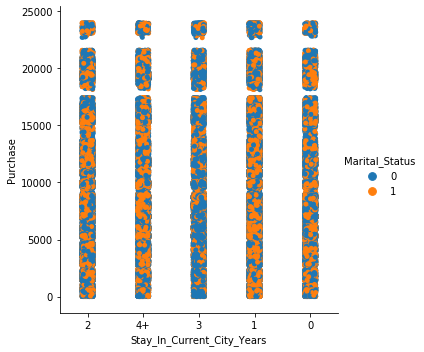

In [9]:
sns.catplot(x="Stay_In_Current_City_Years",y="Purchase",hue="Marital_Status",data=df)

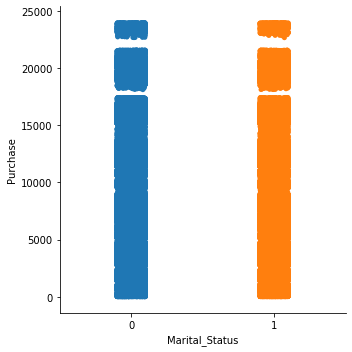

In [10]:
sns.catplot(x="Marital_Status",y="Purchase",data=df)

In [11]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

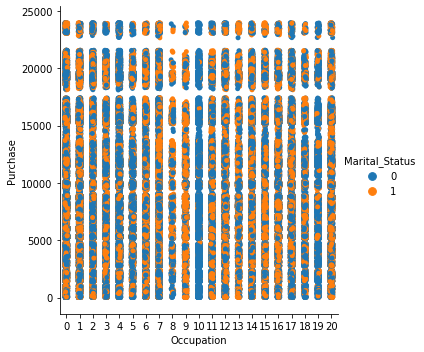

In [14]:
sns.catplot(x="Occupation",y="Purchase",hue="Marital_Status",data=df)

In [16]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [20]:
df[df["Occupation"]==10]

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
85      1000019  P00112542      M   0-17          10             A   
...         ...        ...    ...    ...         ...           ...   
549890  1005784  P00372445      M  18-25          10             C   
549904  1005803  P00375436      M   0-17          10             C   
550012  1005953  P00370853      M   0-17          10             B   
550024  1005973  P00370293      M   0-17          10             C   
550035  1005989  P00370853      F   0-17          10             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
85                              3               0                   1   
...                           ...             ...                 ...   
549890                          3               0                  20   
549904                          1               0                  20   
550012                          0               0                  19   
550024                         4+               0                  19   
550035                          3               0                  19   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
85                    11.0                15.0      7746  
...                    ...                 ...       ...  
549890                 NaN                 NaN       488  
549904                 NaN                 NaN       256  
550012                 NaN                 NaN        26  
550024                 NaN                 NaN        12  
550035                 NaN                 NaN        61  

[12930 rows x 12 columns]

In [9]:
dic={}
for occ_id in df.Occupation.unique():
    dic.update({occ_id:df[df["Occupation"]==occ_id]["Purchase"].sum()})

In [10]:
dic

{10: 115844465,
 16: 238346955,
 15: 118960211,
 7: 557371587,
 20: 296570442,
 9: 54340046,
 1: 424614144,
 12: 305449446,
 17: 393281453,
 0: 635406958,
 3: 162002168,
 4: 666244484,
 11: 106751618,
 8: 14737388,
 19: 73700617,
 2: 238028583,
 18: 60721461,
 5: 113649759,
 14: 259454692,
 13: 71919481,
 6: 188416784}

In [11]:
sdic=dict(sorted(dic.items(), key=lambda item: item[1]))

In [23]:
keyl=sdic.keys()
keys=list(keyl)
keys[0]

8

In [24]:
dic={}
for i in range(21):
    dic.update({keys[i]:i+1})
dic


{8: 1,
 9: 2,
 18: 3,
 13: 4,
 19: 5,
 11: 6,
 5: 7,
 10: 8,
 15: 9,
 3: 10,
 6: 11,
 2: 12,
 16: 13,
 14: 14,
 20: 15,
 12: 16,
 17: 17,
 1: 18,
 7: 19,
 0: 20,
 4: 21}

In [25]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [27]:
df["Occupation_Priority"]=df["Occupation"]

In [31]:
df['Occupation_Priority']=df.Occupation_Priority.replace(dic)

In [32]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  Occupation_Priority  
0      8370                    8  
1     15200                    8  
2      1422                    8  
3      1057                    8  
4      7969                   13

In [62]:
def residual(preds,y_test):
    yt=np.array(y_test)
    residual=yt-preds
    sns.scatterplot(preds,residual)
    

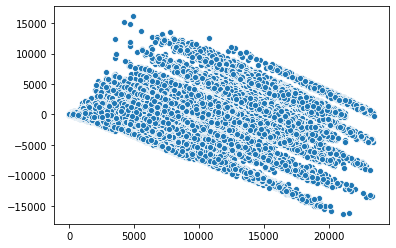

In [63]:
residual(preds,y_test)

In [64]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase  \
0               0                   3            9.842329      8370   
1               0                   1            6.000000     15200   
2               0                  12            9.842329      1422   
3               0                  12           14.000000      1057   
4               0                   8            9.842329      7969   

   Occupation_Priority  
0                    8  
1                    8  
2                    8  
3                    8  
4                   13

In [2]:
temp_df=pd.read_csv("train.csv")
temp_df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [3]:
temp_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
temp=temp_df["Product_Category_1"].unique()
temp

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [5]:
li=[]
for item in temp:
    ans=temp_df[temp_df["Product_Category_1"]==item]["Product_Category_2"].mode()
    if len(ans)!=0:
        temp_df.loc[(temp_df.Product_Category_1==item) & (temp_df.Product_Category_2.isna()==True),'Product_Category_2']=ans[0]
        li.append(temp_df[temp_df["Product_Category_1"]==item]["Product_Category_2"].isna().sum())
li

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
li=[]
for item in temp:
    ans=temp_df[temp_df["Product_Category_1"]==item]["Product_Category_3"].mode()
    if len(ans)!=0:
        temp_df.loc[(temp_df.Product_Category_1==item) & (temp_df.Product_Category_3.isna()==True),'Product_Category_3']=ans[0]
        li.append(temp_df[temp_df["Product_Category_1"]==item]["Product_Category_3"].isna().sum())
li

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
temp_df.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            17684
Product_Category_3            23338
Purchase                          0
dtype: int64

In [8]:
17684+23338

41022

In [12]:
temp_df.shape

(550068, 12)

In [11]:
temp_df["Product_Category_3"].fillna(0,inplace=True)
temp_df["Product_Category_2"].fillna(0,inplace=True)

In [13]:
dic={}
for occ_id in temp_df.Occupation.unique():
    dic.update({occ_id:temp_df[temp_df["Occupation"]==occ_id]["Purchase"].sum()})

In [14]:
sdic=dict(sorted(dic.items(),key=lambda x:x[1]))
keys=list(sdic.keys())
keys

[8, 9, 18, 13, 19, 11, 5, 10, 15, 3, 6, 2, 16, 14, 20, 12, 17, 1, 7, 0, 4]

In [15]:
dic={}
for i in range(21):
    dic.update({keys[i]:i+1})
dic


{8: 1,
 9: 2,
 18: 3,
 13: 4,
 19: 5,
 11: 6,
 5: 7,
 10: 8,
 15: 9,
 3: 10,
 6: 11,
 2: 12,
 16: 13,
 14: 14,
 20: 15,
 12: 16,
 17: 17,
 1: 18,
 7: 19,
 0: 20,
 4: 21}

In [22]:
temp_df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Occupation_priority  \
0                 4.0                 5.0      8370                    8   
1                 6.0                14.0     15200                    8   
2                14.0                17.0      1422                    8   
3                14.0                17.0      1057                    8   
4                14.0                17.0      7969                   13   

   City_Priority  
0              4  
1              4  
2              4  
3              4  
4              2

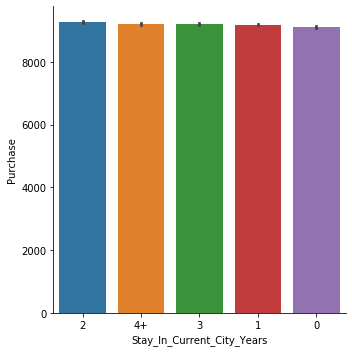

In [36]:
sns.catplot(x="Stay_In_Current_City_Years",y="Purchase",data=temp_df,kind="bar")

In [19]:
dic={}
for item in temp_df.Stay_In_Current_City_Years.unique():
    dic.update({item:temp_df[temp_df["Stay_In_Current_City_Years"]==item]["Purchase"].sum()})
dic

{'2': 949173931,
 '4+': 785884390,
 '3': 884902659,
 '1': 1792872533,
 '0': 682979229}

In [20]:
sdic=dict(sorted(dic.items(),key=lambda x:x[1]))
key=list(sdic.keys())
key
dic={'0':1,"4+":2,'3':3,'2':4,'1':5}
temp_df["City_Priority"]=temp_df["Stay_In_Current_City_Years"].replace(dic)

In [21]:
dic

{'0': 1, '4+': 2, '3': 3, '2': 4, '1': 5}

In [17]:
temp_df["Occupation_priority"]=temp_df["Occupation"].replace(dic)

In [23]:
X=temp_df.drop(columns=["User_ID","Product_ID","Purchase"])
Y=temp_df["Purchase"]

In [24]:
X.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 4.0                 5.0   
1               0                   1                 6.0                14.0   
2               0                  12                14.0                17.0   
3               0                  12                14.0                17.0   
4               0                   8                14.0                17.0   

   Occupation_priority  City_Priority  
0                    8              4  
1                    8              4  
2                    8              4  
3                    8              4  
4                   13              2

In [28]:
col=["Gender","Age","City_Category","Stay_In_Current_City_Years"]
one_hot=OneHotEncoder()
col_trans=ColumnTransformer([("One_hot",one_hot,col)],remainder="passthrough")
transformed_X=col_trans.fit_transform(X)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,Y,test_size=0.2)

In [30]:
model=RandomForestRegressor(n_jobs=-1)

In [31]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
preds=model.predict(X_test)
preds

array([11137.86683333, 16345.615     ,  6626.32057143, ...,
        4912.02209653,  8086.47374068,  7478.15430422])

In [33]:
def rme(p,yt):
    temp=0
    item=len(p)
    for i in range(item):
        temp+=((p[i]-yt[i])*(p[i]-yt[i]))
    temp/=item
    temp=np.sqrt(temp)
    return temp
    

In [34]:
yt=np.array(y_test)
yt

array([ 7921, 20462,  7140, ...,  3749,  6165,  7782], dtype=int64)

In [48]:
rme(preds,yt)

2972.705384841544

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
mod=GradientBoostingRegressor()
mod.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
preds=mod.predict(X_test)
preds

array([10233.42245844, 14883.55845392,  6254.42965811, ...,
        6156.1606718 ,  7558.65353166,  7523.44862277])

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
mode=DecisionTreeRegressor(random_state=0)
mode.fit(X_train,y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [45]:
pree=mode.predict(X_test)
pree

array([10818.5       , 16257.5       ,  6513.        , ...,
        4916.41525424,  8670.94736842,  7440.72413793])

In [47]:
rme(pree,yt)

3253.1625184809172